# Exercises in statistics

## Exercise 3

Load in the data "energySoftware.csv" and answer the following questions:
1. Plot the distribution of CPU for each test type
2. Is there a difference in the CPU between bubblesort and bubblesort_ll? (note that the last name contains two small l's and not two capital i's) Justify your choice of test(s). 
3. Is there a difference in the CPU between bubblesort_func and bubblesort_ll2? Justify your choice of test(s). If there is a difference, how big is it?
4. When it comes to time, is there a difference between bubblesort and bubblesort_ll? Justify your choice of test(s).
5. Perform an ANOVA test to test if there is a difference in means across groups for CPU
6. Perform an ANOVA test to test if there is a difference in means across groups for time

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Load the data
energySoftware = pd.read_csv('energySoftware.csv')

In [11]:
energySoftware

,test,PKG,CPU,nn,nn2,time
0,bubblesort,0.010986,0.009155,,,3.165
1,bubblesort,0.013184,0.010925,,,3.069
2,bubblesort,0.015198,0.009399,,,2.617
3,bubblesort,0.010559,0.009583,,,2.572
4,bubblesort,0.009949,0.009949,,,2.671
...,...,...,...,...,...,...
1436,bubblesort_ll,0.013184,0.014038,,,2.394
1437,bubblesort_ll,0.021362,0.014343,,,2.428
1438,bubblesort_ll,0.013672,0.014221,,,2.479
1439,bubblesort_ll,0.019531,0.014526,,,2.537


1. Plot the distribution of CPU for each test type

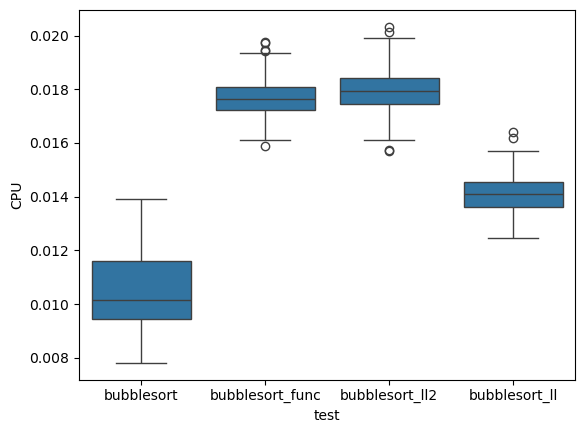

In [13]:
#Plotting the distribution of CPU for each test type.
sns.boxplot(x='test', y='CPU', data=energySoftware)
plt.show()

2. Is there a difference in the CPU between bubblesort and bubblesort_ll? (note that the last name contains two small l's and not two capital i's) Justify your choice of test(s). 

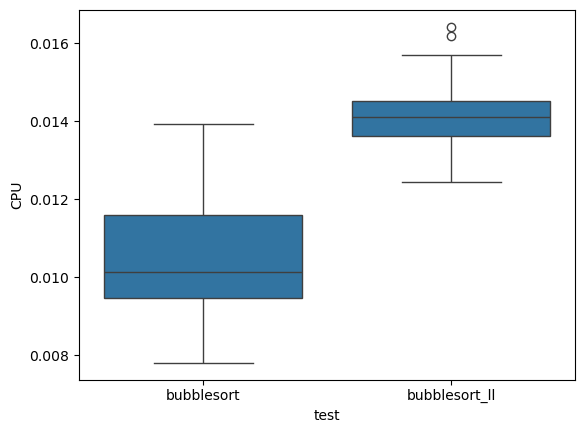

In [20]:
#plotting the distribution between bubblesort and bubblesort_ll
sns.boxplot(x='test', y='CPU', data=energySoftware[energySoftware['test'].isin(['bubblesort', 'bubblesort_ll'])])
plt.show()

In [26]:
#justifying the difference between the two tests
energySoftware[energySoftware["test"] == "bubblesort"].describe()

,PKG,CPU,time
count,361.000000,361.000000,361.000000
mean,0.012697,0.010412,2.518892
std,0.002190,0.001316,0.419260
min,0.008179,0.007812,1.962000
25%,0.010742,0.009460,2.146000
50%,0.013306,0.010132,2.541000
75%,0.014038,0.011597,2.676000
max,0.022034,0.013916,3.902000


In [27]:
energySoftware[energySoftware["test"] == "bubblesort_ll"].describe()

,PKG,CPU,time
count,360.000000,360.000000,360.000000
mean,0.016297,0.014097,2.458178
std,0.003248,0.000662,0.089711
min,0.011169,0.012451,2.320000
25%,0.013428,0.013611,2.405000
50%,0.014252,0.014099,2.443000
75%,0.019836,0.014526,2.491000
max,0.022095,0.016418,3.014000


In [33]:
from scipy.stats import ttest_ind

# Extract CPU data for the relevant test types
cpu_bubblesort = energySoftware[energySoftware["test"] == "bubblesort"]["CPU"]
cpu_bubblesort_ll = energySoftware[energySoftware["test"] == "bubblesort_ll"]["CPU"]

# Perform an independent t-test
t_stat, p_value = ttest_ind(cpu_bubblesort, cpu_bubblesort_ll, equal_var=False)

# Display the results
t_stat, p_value


(-47.49984015922036, 2.0829023107007772e-193)

I've decided to use the t_stat and the p_value. From the t_stat we can see that bubblesort_ll uses more CPU, because the t_stat is negative. The p_value is 0.0 with 193 0's. From the p-value we can determine that bubblesort_ll does use more CPU and bubblesort.

3. Is there a difference in the CPU between bubblesort_func and bubblesort_ll2? Justify your choice of test(s). If there is a difference, how big is it?

In [37]:
#making the difference in the CPU between the bubblesort_func and bubblesort_ll2
energySoftware[energySoftware["test"] == "bubblesort_func"].describe()

,PKG,CPU,time
count,360.000000,360.000000,360.000000
mean,0.020496,0.017669,3.456836
std,0.003063,0.000663,0.115992
min,0.015442,0.015869,3.292000
25%,0.017944,0.017212,3.395000
50%,0.018738,0.017639,3.428500
75%,0.023926,0.018066,3.484000
max,0.026062,0.019775,4.188000


In [38]:
energySoftware[energySoftware["test"] == "bubblesort_ll2"].describe()

,PKG,CPU,time
count,360.000000,360.000000,360.000000
mean,0.020996,0.017919,3.604994
std,0.003059,0.000763,0.094482
min,0.015442,0.015686,3.423000
25%,0.017822,0.017456,3.546000
50%,0.022675,0.017944,3.590500
75%,0.023743,0.018433,3.643750
max,0.026794,0.020325,4.244000


In [39]:
#using ttest to justify the difference between the two tests

# Extract CPU data for the relevant test types
cpu_bubblesort_func = energySoftware[energySoftware["test"] == "bubblesort_func"]["CPU"]
cpu_bubblesort_ll2 = energySoftware[energySoftware["test"] == "bubblesort_ll2"]["CPU"]

# Perform an independent t-test
t_stat, p_value = ttest_ind(cpu_bubblesort_func, cpu_bubblesort_ll2, equal_var=False)

# Display the results
t_stat, p_value

(-4.692273179928858, 3.246796360135079e-06)

I've decided to use the same test, making use of t_stat and p_value. Looking at the `t_stat` its very close, but bubblesort_ll2, does still use more CPU than bubblesort_func. This means that if we look at the p_value which is 0.0 and 6 zeros, we can determine that bubblesort_ll2, uses more CPU

4. When it comes to time, is there a difference between bubblesort and bubblesort_ll? Justify your choice of test(s).

In [40]:
#when it comes to time, is there a difference between the bubblesort and bubblesort_ll
energySoftware[energySoftware["test"] == "bubblesort"].describe()

,PKG,CPU,time
count,361.000000,361.000000,361.000000
mean,0.012697,0.010412,2.518892
std,0.002190,0.001316,0.419260
min,0.008179,0.007812,1.962000
25%,0.010742,0.009460,2.146000
50%,0.013306,0.010132,2.541000
75%,0.014038,0.011597,2.676000
max,0.022034,0.013916,3.902000


In [41]:
energySoftware[energySoftware["test"] == "bubblesort_ll"].describe()

,PKG,CPU,time
count,360.000000,360.000000,360.000000
mean,0.016297,0.014097,2.458178
std,0.003248,0.000662,0.089711
min,0.011169,0.012451,2.320000
25%,0.013428,0.013611,2.405000
50%,0.014252,0.014099,2.443000
75%,0.019836,0.014526,2.491000
max,0.022095,0.016418,3.014000


In [42]:
#using ttest to justify the difference between the time of the two tests

# Extract CPU data for the relevant test types
time_bubblesort = energySoftware[energySoftware["test"] == "bubblesort"]["time"]
time_bubblesort_ll = energySoftware[energySoftware["test"] == "bubblesort_ll"]["time"]

# Perform an independent t-test
t_stat, p_value = ttest_ind(time_bubblesort, time_bubblesort_ll, equal_var=False)

# Display the results
t_stat, p_value

(2.6903718999448643, 0.007441656591061303)

As we can see from the t_test and the p_value numbers. The t_test shows that bubblesort takes longer, which can also be seen in the describe tables above, where bubblesort uses 361 and bubblesort_ll uses 360 time. Looking at the p_value, it is certain that the bubblesort_ll is faster.

5. Perform an ANOVA test to test if there is a difference in means across groups for CPU

In [46]:
#Performing an ANOVA test to test if there is a difference in means across groups for CPU

energySoftware.groupby('test')['CPU'].describe()

,count,mean,std,min,25%,50%,75%,max
test,,,,,,,,
bubblesort,361.0,0.010412,0.001316,0.007812,0.009460,0.010132,0.011597,0.013916
bubblesort_func,360.0,0.017669,0.000663,0.015869,0.017212,0.017639,0.018066,0.019775
bubblesort_ll,360.0,0.014097,0.000662,0.012451,0.013611,0.014099,0.014526,0.016418
bubblesort_ll2,360.0,0.017919,0.000763,0.015686,0.017456,0.017944,0.018433,0.020325


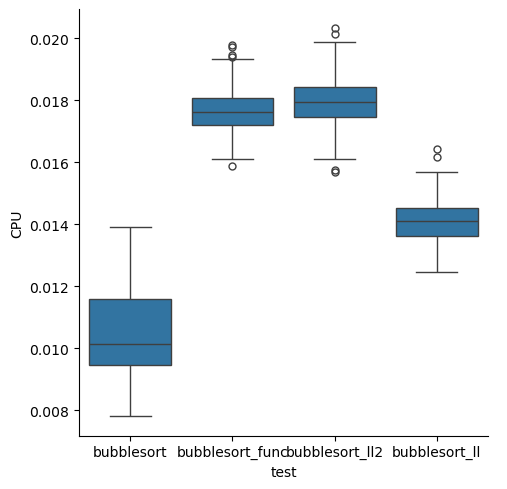

In [47]:
sns.catplot(x='test', y='CPU', data=energySoftware, kind='box')
plt.show()

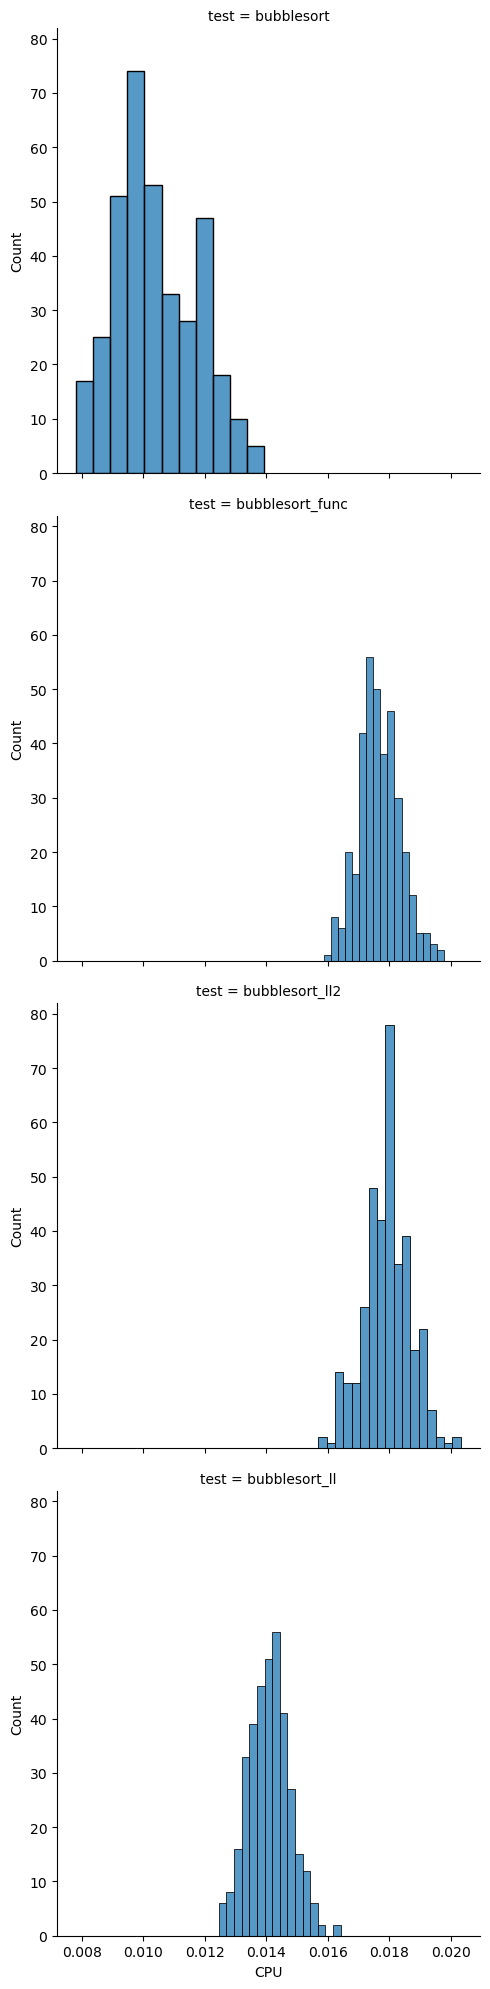

In [52]:
g=sns.FacetGrid(energySoftware, row='test', height = 5)
g.map(sns.histplot, 'CPU')
plt.show()

The distribution of CPU usage varies a lot between the 4 tests, where bubblesort_ll2 and bubblesort_func are close. Bubblesort_ll and bubblesort, varies from each other and the other tests.

In [50]:
from scipy import stats

stats.f_oneway(energySoftware[energySoftware["test"] == "bubblesort"]["CPU"],
               energySoftware[energySoftware["test"] == "bubblesort_ll"]["CPU"],
               energySoftware[energySoftware["test"] == "bubblesort_func"]["CPU"],
               energySoftware[energySoftware["test"] == "bubblesort_ll2"]["CPU"])

F_onewayResult(statistic=5641.937696029289, pvalue=0.0)

As we can see, the p-value of 0 tells us that there is a difference, however it doesn't tell us which groups of test has the highest CPU usage. Further tests would be needed to decide that.

6. Perform an ANOVA test to test if there is a difference in means across groups for time

In [53]:
#Performing an ANOVA test to test if there is a difference in means across groups for time

energySoftware.groupby('test')['time'].describe()

,count,mean,std,min,25%,50%,75%,max
test,,,,,,,,
bubblesort,361.0,2.518892,0.419260,1.962,2.146,2.5410,2.67600,3.902
bubblesort_func,360.0,3.456836,0.115992,3.292,3.395,3.4285,3.48400,4.188
bubblesort_ll,360.0,2.458178,0.089711,2.320,2.405,2.4430,2.49100,3.014
bubblesort_ll2,360.0,3.604994,0.094482,3.423,3.546,3.5905,3.64375,4.244


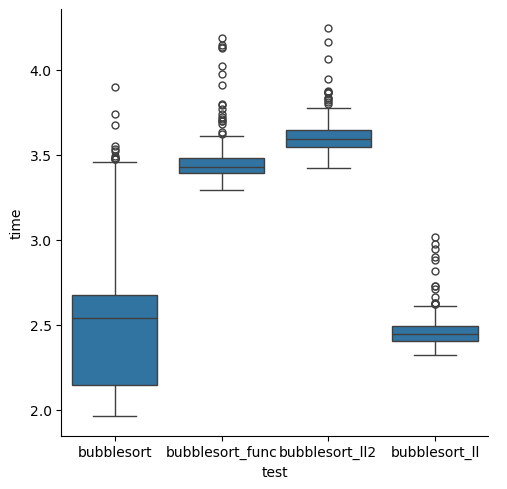

In [55]:
sns.catplot(x='test', y='time', data=energySoftware, kind='box')
plt.show()

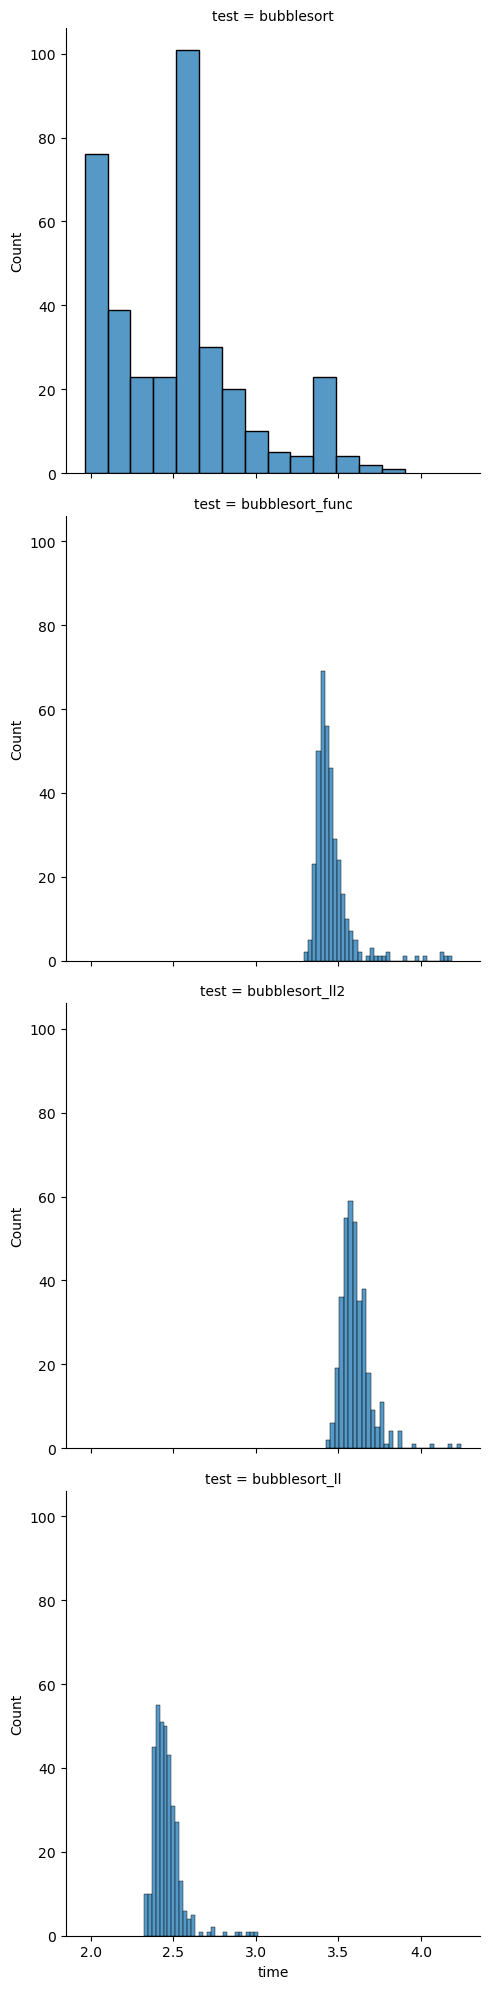

In [57]:
g=sns.FacetGrid(energySoftware, row='test', height = 5)
g.map(sns.histplot, 'time')
plt.show()

In [58]:
stats.f_oneway(energySoftware[energySoftware["test"] == "bubblesort"]["time"],
               energySoftware[energySoftware["test"] == "bubblesort_ll"]["time"],
               energySoftware[energySoftware["test"] == "bubblesort_func"]["time"],
               energySoftware[energySoftware["test"] == "bubblesort_ll2"]["time"])

F_onewayResult(statistic=2556.3329354127823, pvalue=0.0)

We can see that the p_value tells us there is a difference in time, however it does not tell us which group of tests have different time. Further tests needs to decide that.